In [1]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, KFold

from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [4]:
drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/Resources/buX/2022 - Semester 8 - Summer/CSE422/Project'

Mounted at /content/drive


In [5]:
dataset_filename = 'business_bankruptcy_dataset.csv'
dataset_path = f'{project_path}/datasets/{dataset_filename}'
business_data_df = pd.read_csv(dataset_path)

In [6]:
business_data_df.shape

(6819, 96)

In [7]:
business_data_df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [8]:
business_data_df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [9]:
any(business_data_df.sum().isnull())

False

In [10]:
y = pd.DataFrame(business_data_df['Bankrupt?'], columns = ['Bankrupt?'])
X = business_data_df.copy().drop(['Bankrupt?'], axis='columns')

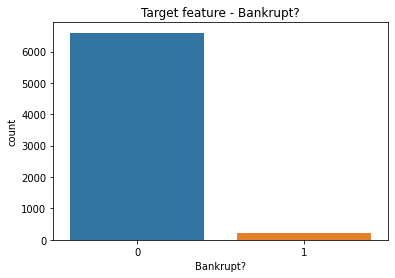

In [11]:
sns.countplot(x=y['Bankrupt?'])
plt.title('Target feature - Bankrupt?')
if not os.path.exists(f'{project_path}/figures/target_class_plot'):
    plt.savefig(f'{project_path}/figures/target_class_plot', bbox_inches='tight')

In [12]:
oversample = SMOTE()
X, y=oversample.fit_resample(X, y)

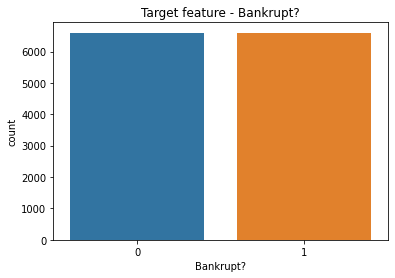

In [13]:
sns.countplot(x=y['Bankrupt?'])
plt.title('Target feature - Bankrupt?')
if not os.path.exists(f'{project_path}/figures/oversampled_target_class_plot'):
    plt.savefig(f'{project_path}/figures/oversampled_target_class_plot', bbox_inches='tight')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

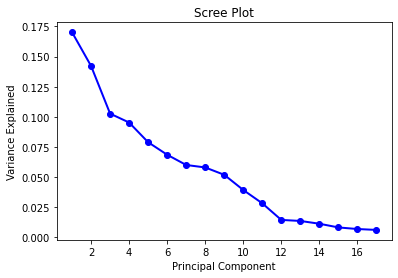

In [15]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled_df=pd.DataFrame(scaler.transform(X), columns=X.columns)

pca = PCA(n_components=0.95)
pca_fit = pca.fit(scaled_df)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
if not os.path.exists(f'{project_path}/figures/scree_plot'):
    plt.savefig(f'{project_path}/figures/scree_plot', bbox_inches='tight')

In [16]:
pipelines = []

preprocessing = [
    ('StandardScaler', StandardScaler()),
    ('MinMaxScaler', MinMaxScaler()),
    ('PCA', PCA(n_components=13))
]

models = [
    ('RandomForestClassifier', RandomForestClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier(criterion='entropy')),
    ('LogisticRegression', LogisticRegression()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('MLPClassifier', MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000))
]

for model in models:
    pipelines.append(Pipeline([preprocessing[1], model]))
    pipelines.append(Pipeline([preprocessing[1], preprocessing[2], model]))

In [17]:
for pipeline in pipelines:
    print(pipeline.named_steps)
    pipeline.fit(X_train, y_train)
    print("Training accuracy is {:.4f}".format(pipeline.score(X_train, y_train)))
    print("Testing accuracy is {:.4f} ".format(pipeline.score(X_test, y_test)))
    print('----------------------------------------------------------------------')

{'MinMaxScaler': MinMaxScaler(), 'RandomForestClassifier': RandomForestClassifier()}
Training accuracy is 1.0000
Testing accuracy is 0.9777 
----------------------------------------------------------------------
{'MinMaxScaler': MinMaxScaler(), 'PCA': PCA(n_components=13), 'RandomForestClassifier': RandomForestClassifier()}
Training accuracy is 1.0000
Testing accuracy is 0.9822 
----------------------------------------------------------------------
{'MinMaxScaler': MinMaxScaler(), 'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy')}
Training accuracy is 1.0000
Testing accuracy is 0.9511 
----------------------------------------------------------------------
{'MinMaxScaler': MinMaxScaler(), 'PCA': PCA(n_components=13), 'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy')}
Training accuracy is 1.0000
Testing accuracy is 0.9424 
----------------------------------------------------------------------
{'MinMaxScaler': MinMaxScaler(), 'LogisticRegression': L

In [18]:
scores = []

for pipeline in pipelines:
    cv = KFold(n_splits=10, random_state=42, shuffle=True)
    pipeline_name = '_'.join([name for name in pipeline.named_steps.keys()])
    scores.append([pipeline_name, cross_validate(pipeline, X, y, cv=cv, scoring='f1')])

In [19]:
model_names, fit_times, score_times, test_scores = [], [], [], []
for score in scores:
    model_name, score_dict = score
    model_names.append(model_name)
    fit_times.append(np.mean(score_dict['fit_time']))
    score_times.append(np.mean(score_dict['score_time']))
    test_scores.append(np.mean(score_dict['test_score']))

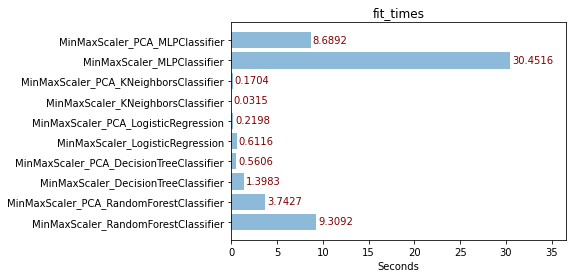

In [20]:
X_axis = np.arange(len(model_names))
xmin, xmax = min(fit_times), max(fit_times)
margin = (xmax - xmin) * 0.2
xmin, xmax = xmin - margin, xmax + margin
plt.xlim((xmin if xmin > 0 else 0, xmax))
plt.barh(X_axis, fit_times, align='center', alpha=0.5)
plt.yticks(X_axis, model_names)
plt.xlabel('Seconds')
plt.title('fit_times')
for i, v in enumerate(fit_times):
    plt.text(v + 0.2, i - 0.13, f'{v:.4f}', color = 'maroon')
if not os.path.exists(f'{project_path}/figures/fit_times'):
    plt.savefig(f'{project_path}/figures/fit_times', bbox_inches='tight')

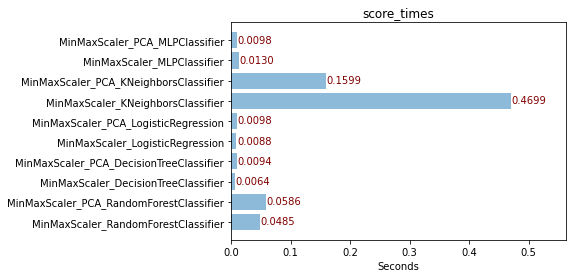

In [21]:
plt.barh(X_axis, score_times, align='center', alpha=0.5)
xmin, xmax = min(score_times), max(score_times)
margin = (xmax - xmin) * 0.2
xmin, xmax = xmin - margin, xmax + margin
plt.xlim((xmin if xmin > 0 else 0, xmax))
plt.yticks(X_axis, model_names)
plt.xlabel('Seconds')
plt.title('score_times')
for i, v in enumerate(score_times):
    plt.text(v + 0.001, i - 0.13, f'{v:.4f}', color = 'maroon')
if not os.path.exists(f'{project_path}/figures/score_times'):
    plt.savefig(f'{project_path}/figures/score_times', bbox_inches='tight')

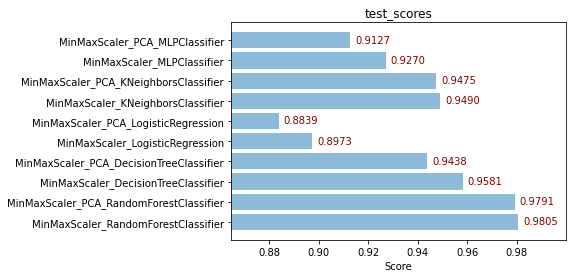

In [22]:
plt.barh(X_axis, test_scores, align='center', alpha=0.5)
xmin, xmax = min(test_scores), max(test_scores)
margin = (xmax - xmin) * 0.2
xmin, xmax = xmin - margin, xmax + margin
plt.xlim((xmin if xmin > 0 else 0, xmax))
plt.yticks(X_axis, model_names)
plt.xlabel('Score')
plt.title('test_scores')
for i, v in enumerate(test_scores):
    plt.text(v + 0.002, i - 0.13, f'{v:.4f}', color = 'maroon')
if not os.path.exists(f'{project_path}/figures/test_scores'):
    plt.savefig(f'{project_path}/figures/test_scores', bbox_inches='tight')

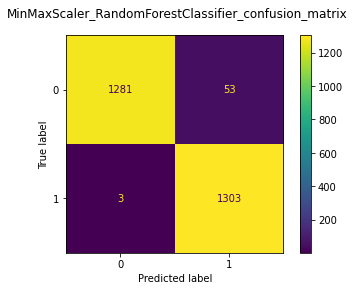

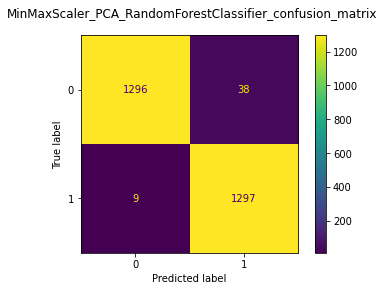

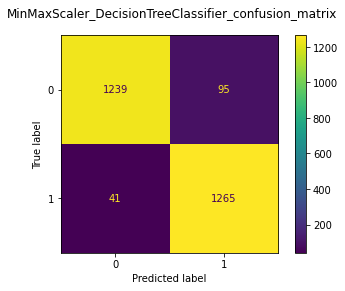

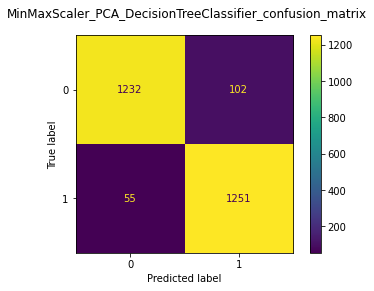

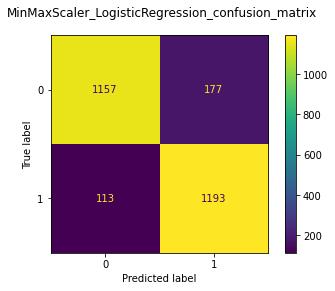

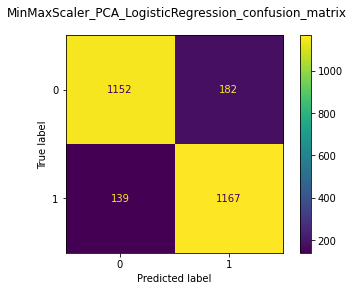

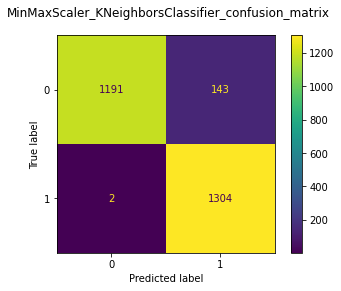

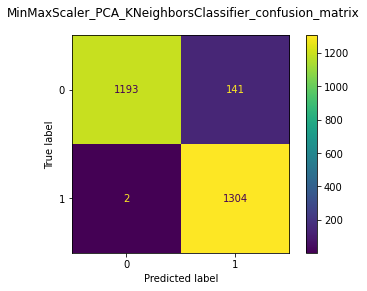

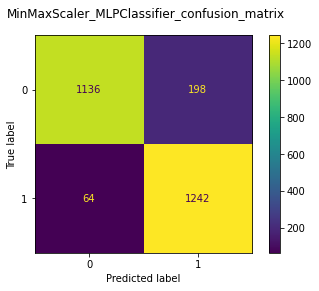

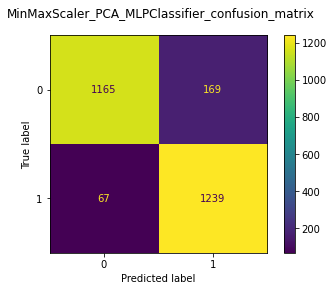

In [23]:
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    cnm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    cnm.plot()
    fig_name = '_'.join([name for name in pipeline.named_steps.keys()]) + '_confusion_matrix'
    if not os.path.exists(f'{project_path}/figures/{fig_name}'):
        fig = cnm.figure_
        fig.suptitle(fig_name)
        fig.savefig(f'{project_path}/figures/{fig_name}')